#Taller Final
Juan Castellanos - Sergio Moreno - Ashly Riaño


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import linprog

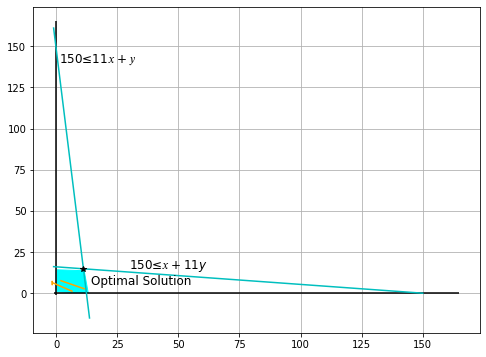

In [ ]:
#@title
from matplotlib.patches import Polygon
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()

# Draw constraint lines
ax.hlines(0, -1, 165)
ax.vlines(0, -1, 165)
ax.plot(np.linspace(-1, 13.68, 200), 150-11*np.linspace(-1, 15, 200), color="c")
ax.plot(np.linspace(-1, 150, 140), 13.68-2.48*np.linspace(-1, 5.5, 140), color="c")
ax.text(1, 140, "$150≤11𝑥+𝑦$", size=12)
ax.text(30, 15, "$150≤𝑥+11y$", size=12)

# Draw the feasible region
feasible_set = Polygon(np.array([[0, 1], 
                                 [0, 14.26], 
                                 [11.5, 13.68], 
                                 [13.18, 0]]), 
                       color="cyan")
ax.add_patch(feasible_set)

# Draw the objective function
ax.plot(np.linspace(-1, 6.5, 100), 5.375-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.plot(np.linspace(2, 11.5, 100), 6.875-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.arrow(-1.6, 5, 0, 2, width = 0.05, head_width=0.2, head_length=0.5, color="orange")

# Draw the optimal solution
ax.plot(11, 14.86, "*", color="black")
ax.text(14.26, 5.2, "Optimal Solution", size=12)

plt.show()


$$ \min 300 ≤  5 x + 6 y $$
$$ 150 \leq 11 x + y  $$
$$ 150 \leq x + 11 xy $$
$$ x,\ y \geq 0 $$

In [ ]:
import numpy as np
from scipy.optimize import linprog
c = np.array([5,6])
A_ub = np.array([[11,1],
                [-1,-11]])
b_ub = np.array([150,150])
res = linprog(-c,
              A_ub = A_ub,
              b_ub = b_ub)
print(res)

     con: array([], dtype=float64)
     fun: -899.9999473738037
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([4.98458718e-06, 1.79999990e+03])
  status: 0
 success: True
       x: array([3.72437265e-07, 1.49999991e+02])


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:
# Parametros de la función objetivo
c1 = np.array([5, 6])
# x es la variable decision, 
# Restricciones de desigualdad
A1 = np.array([[11, 1],
                  [-1, -11]])
b1 = np.array([150,150])
# cantidades de mano de obra y material. "Se pueden poner mas restricciones, como costos"
# Solución del problema
sol1 = linprog(-c1, A_ub=A1, b_ub=b1, method='revised simplex')
sol1

     con: array([], dtype=float64)
     fun: -900.0
 message: 'Optimization terminated successfully.'
     nit: 1
   slack: array([   0., 1800.])
  status: 0
 success: True
       x: array([  0., 150.])

2. Punto


In [ ]:
def random_walk(N, T, mu=0, sigma=1):
  '''
  Args:
      T : Duration of simulation in time steps
      N : Number of random walks
      mu : mean 
      sigma : standard deviation 
  '''
  rands = np.random.normal(mu, sigma, size=(N, T))
  # compute the cumulative sum of all the steps over the time
  sim = np.cumsum(rands, axis=1)
  return sim

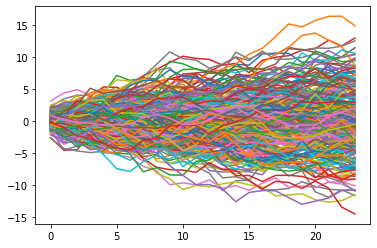

In [ ]:
sim = random_walk(257, 24,  mu=0, sigma=1)
plt.plot(np.transpose(sim));

In [ ]:
from scipy import stats
from matplotlib import pyplot as plt
import math
import seaborn as sbn
# Scikit Learn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
import warnings
warnings.simplefilter("ignore")

In [ ]:
prob = sim > 0.1
prob

array([[False, False, False, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True]])

In [ ]:
n_clusters = 2  # K
km = KMeans( n_clusters=n_clusters)
km.fit(prob)
y = km.predict(prob)

In [ ]:
z = pd.Series(y).value_counts()
z

1    130
0    127
dtype: int64

In [ ]:
(z[1]/257)*100

50.583657587548636